In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

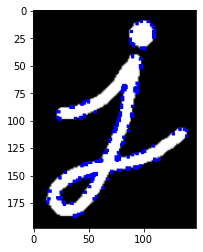

(<matplotlib.image.AxesImage at 0x1e86c416cd0>, None)

In [7]:
filename = 'i.png'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]
cv2.imshow('dst',img)
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()
plt.imshow(img),plt.show()

In [8]:
#img = cv2.imread('i.png')
#gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
#corners = np.int0(corners)
#for i in corners:
#    x,y = i.ravel()
#    cv2.circle(img,(x,y),3,255,-1)
#plt.imshow(img),plt.show()

In [9]:
img = cv2.imread('lena.png')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp = sift.detect(gray,None)
imgsift = cv2.imread('lena.png')
imgsift=cv2.drawKeypoints(img,kp,imgsift,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

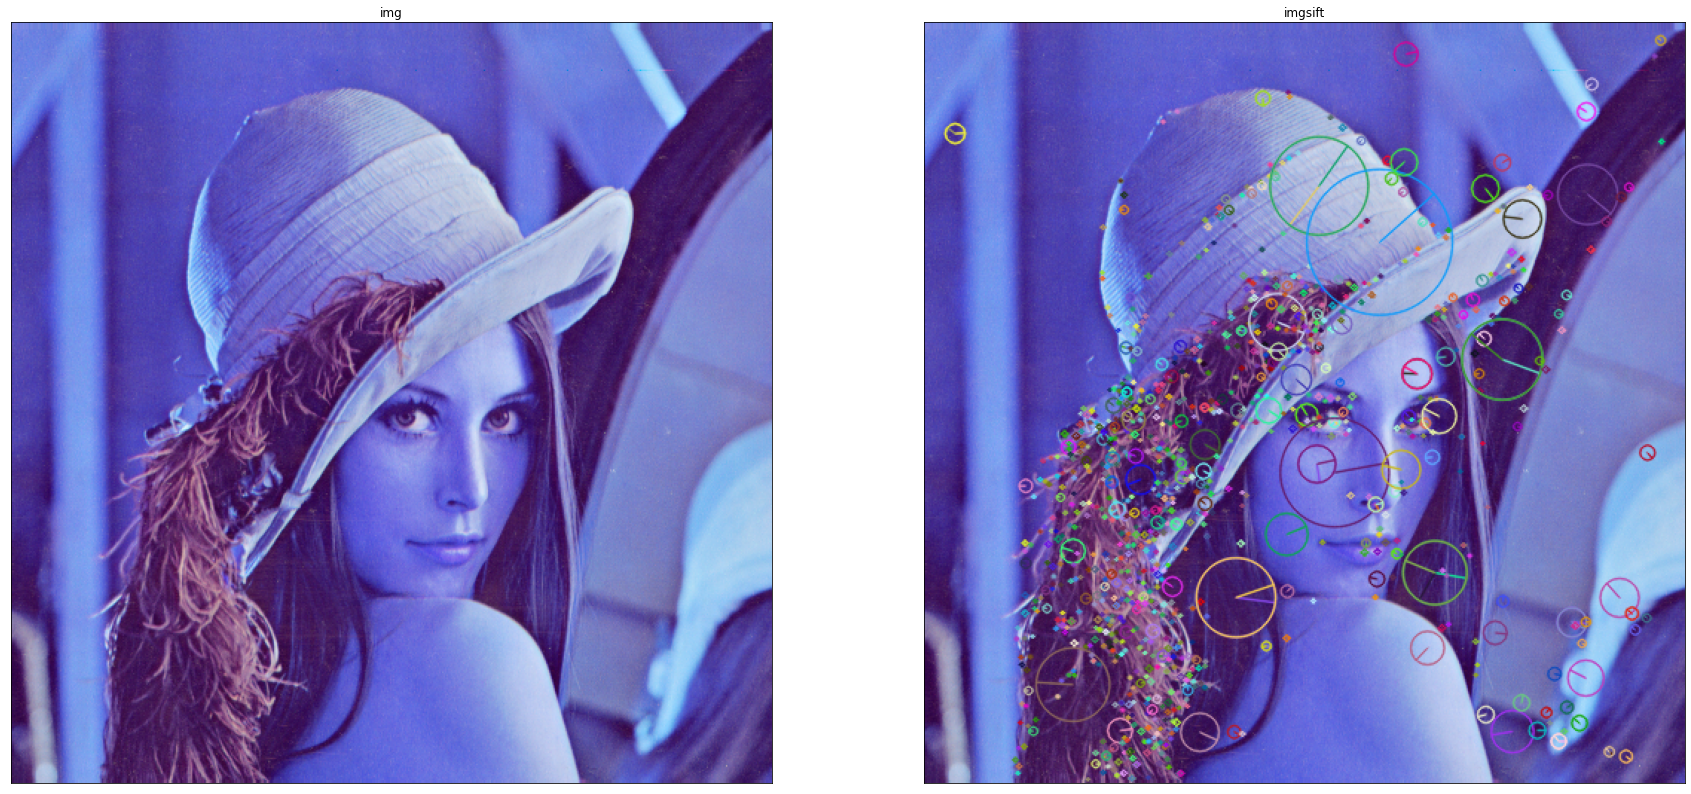

In [10]:
plt.figure(figsize = (30,45))
plt.subplot(1,2,1),plt.imshow(img,cmap = 'gray')
plt.title('img'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgsift,cmap = 'gray')
plt.title('imgsift'), plt.xticks([]), plt.yticks([])
plt.show()

In [51]:
img1 = cv2.imread('far.jpg', 0) # queryImage
img2 = cv2.imread('near.jpg', 0) # trainImage

In [52]:
# Initiate SIFT detector
#sift = cv2.SIFT()
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

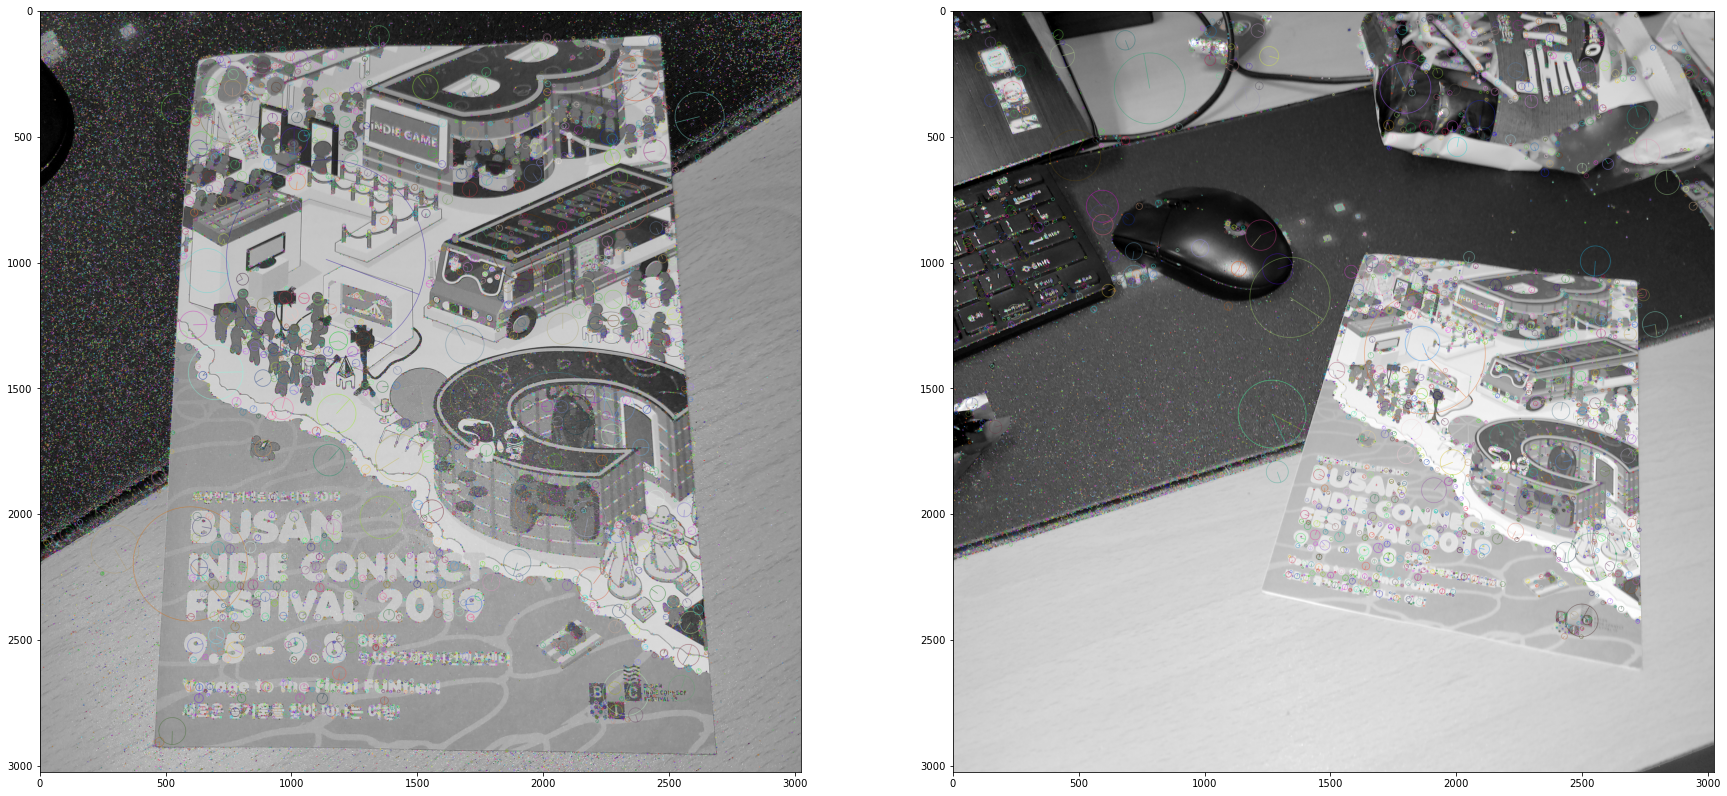

In [53]:
img1v = cv2.drawKeypoints(img1, kp1, img1, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) #,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
img2v = cv2.drawKeypoints(img2, kp2, img2, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize = (30,26))
plt.subplot(1,2,1), plt.imshow(img1v)
plt.subplot(1,2,2), plt.imshow(img2v)
plt.show()

In [54]:
print(kp1[0])

<KeyPoint 000001E40C128E70>


In [55]:
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []

In [56]:
good = []
for m,n in matches:
    #print(m.distance, n.distance)
    if m.distance < 0.5*n.distance:
        good.append([m])

2993


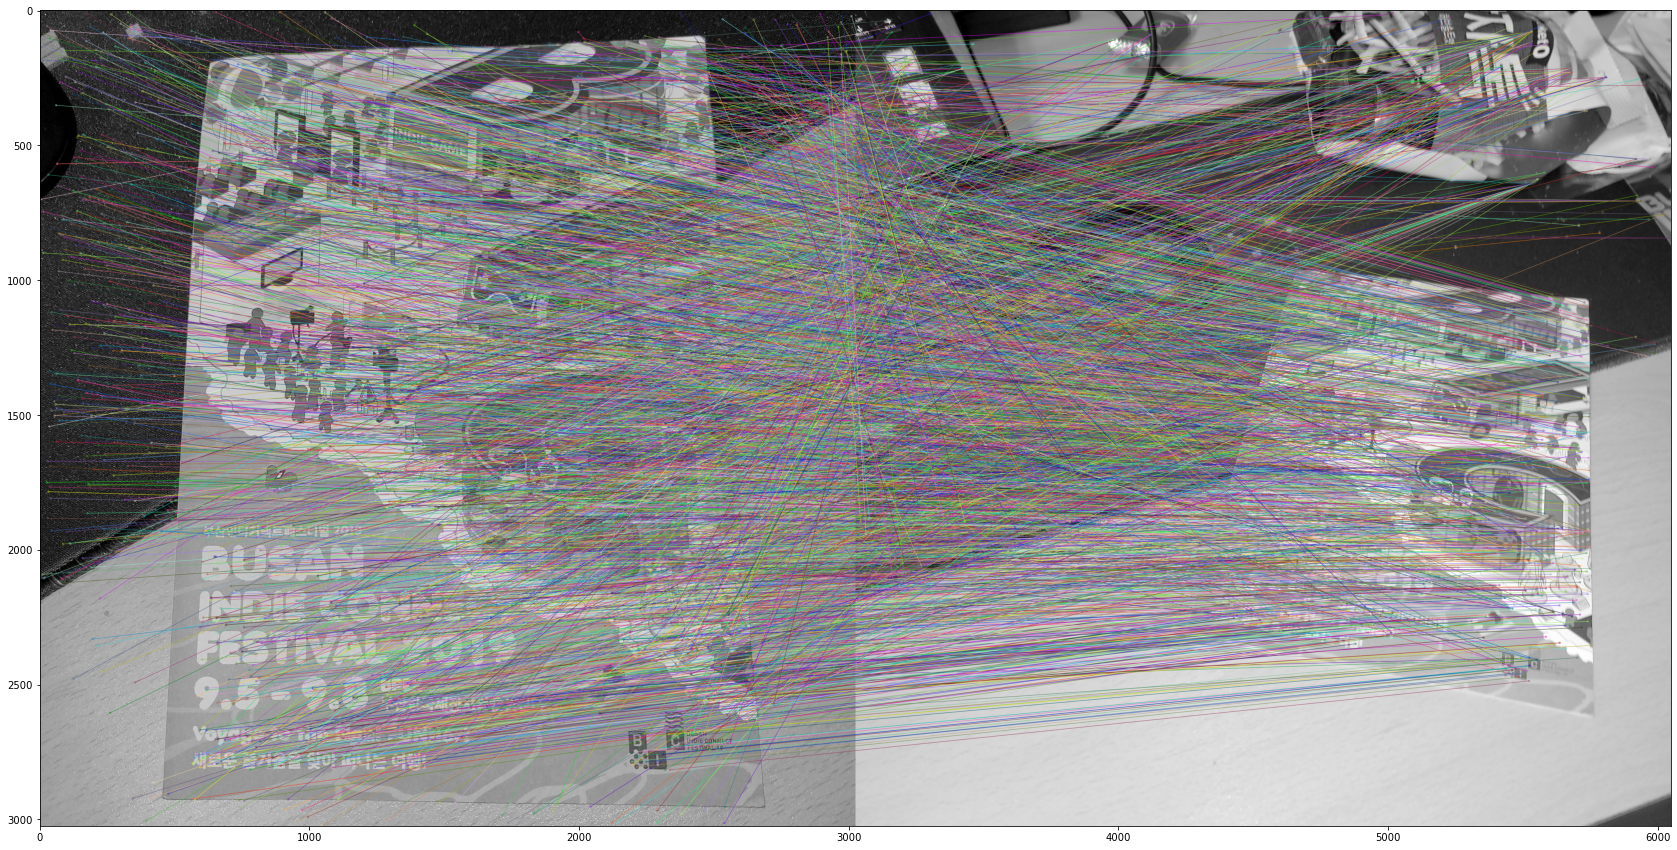

(<matplotlib.image.AxesImage at 0x1e40c80d700>, None)

In [57]:
print(len(good))
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.figure(figsize=(30,15))
plt.imshow(img3),plt.show()